In [1]:
import os
import re
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from PIL import Image

In [2]:
files_to_ignore = ['.DS_Store']
script_1_path = '../../model_results/gru_results/script_2/GRU_sl10/'
script_1_folders = os.listdir(script_1_path)
script_1_folders = [folder for folder in script_1_folders if folder not in files_to_ignore]
script_1_folders

['GRUs2_2023-09-18_14-02-23__40',
 'GRUs2_2023-09-18_15-23-59__1164',
 'GRUs2_2023-09-20_12-11-01__1220',
 'final_merged_results',
 'GRUs2_2023-09-22_10-11-24__3268',
 'GRUs2_2023-09-20_15-11-52__2372',
 'GRUs2_2023-09-22_04-49-17__1284']

In [3]:
results_path = f'{script_1_path}final_merged_results/'
df = pd.read_csv(f'{results_path}gru_script_2_gridSearch_results.csv')
df

script_num  search_count  sequence_length  units  dropout_rate  \
0              2             1               10     32           0.0   
1              2             2               10     32           0.0   
2              2             3               10     32           0.0   
3              2             4               10     32           0.0   
4              2             5               10     32           0.0   
...          ...           ...              ...    ...           ...   
2875           2          3452               10    128           0.6   
2876           2          3453               10    128           0.6   
2877           2          3454               10    128           0.6   
2878           2          3455               10    128           0.6   
2879           2          3456               10    128           0.6   

     activation_function             loss_function optimizer  num_epochs  \
0                sigmoid  categorical_crossentropy       SGD         250   
1                sigmoid  categorical_crossentropy       SGD         250   
2                sigmoid  categorical_crossentropy       SGD         250   
3                sigmoid  categorical_crossentropy       SGD         250   
4                sigmoid  categorical_crossentropy       SGD         500   
...                  ...                       ...       ...         ...   
2875             softmax                     hinge      Adam         500   
2876             softmax                     hinge      Adam        1000   
2877             softmax                     hinge      Adam        1000   
2878             softmax                     hinge      Adam        1000   
2879             softmax                     hinge      Adam        1000   

      batch_size  ...  test_accuracy             precision_values  \
0            512  ...         0.3616  {0: 0.53, 1: 0.26, 2: 0.19}   
1           1024  ...         0.4038   {0: 0.57, 1: 0.3, 2: 0.21}   
2           2048  ...         0.4385  {0: 0.58, 1: 0.31, 2: 0.16}   
3           4096  ...         0.4592  {0: 0.59, 1: 0.32, 2: 0.18}   
4            512  ...         0.3489  {0: 0.54, 1: 0.25, 2: 0.17}   
...          ...  ...            ...                          ...   
2875        4096  ...         0.3187  {0: 0.59, 1: 0.27, 2: 0.17}   
2876         512  ...         0.3199   {0: 0.57, 1: 0.27, 2: 0.2}   
2877        1024  ...         0.3345   {0: 0.63, 1: 0.3, 2: 0.17}   
2878        2048  ...         0.3438   {0: 0.6, 1: 0.29, 2: 0.18}   
2879        4096  ...         0.3147   {0: 0.6, 1: 0.27, 2: 0.16}   

                    recall_values                    f1_scores  \
0     {0: 0.38, 1: 0.44, 2: 0.16}  {0: 0.44, 1: 0.33, 2: 0.17}   
1     {0: 0.41, 1: 0.57, 2: 0.11}  {0: 0.48, 1: 0.39, 2: 0.14}   
2      {0: 0.52, 1: 0.5, 2: 0.06}  {0: 0.55, 1: 0.38, 2: 0.09}   
3      {0: 0.58, 1: 0.41, 2: 0.1}  {0: 0.58, 1: 0.36, 2: 0.13}   
4     {0: 0.36, 1: 0.43, 2: 0.17}  {0: 0.43, 1: 0.32, 2: 0.17}   
...                           ...                          ...   
2875  {0: 0.23, 1: 0.57, 2: 0.22}  {0: 0.33, 1: 0.36, 2: 0.19}   
2876   {0: 0.21, 1: 0.57, 2: 0.3}  {0: 0.31, 1: 0.37, 2: 0.24}   
2877  {0: 0.25, 1: 0.53, 2: 0.33}  {0: 0.35, 1: 0.38, 2: 0.23}   
2878   {0: 0.26, 1: 0.6, 2: 0.23}   {0: 0.36, 1: 0.39, 2: 0.2}   
2879  {0: 0.23, 1: 0.54, 2: 0.25}   {0: 0.33, 1: 0.36, 2: 0.2}   

                                         macro_averages  \
0     {'precision': 0.33, 'recall': 0.33, 'f1_score'...   
1     {'precision': 0.36, 'recall': 0.36, 'f1_score'...   
2     {'precision': 0.35, 'recall': 0.36, 'f1_score'...   
3     {'precision': 0.36, 'recall': 0.36, 'f1_score'...   
4     {'precision': 0.32, 'recall': 0.32, 'f1_score'...   
...                                                 ...   
2875  {'precision': 0.34, 'recall': 0.34, 'f1_score'...   
2876  {'precision': 0.35, 'recall': 0.36, 'f1_score'...   
2877  {'precision': 0.37, 'recall': 0.37, 'f1_score'...   
2878  {'precisio

In [4]:
df.dtypes

script_num                 int64
search_count               int64
sequence_length            int64
units                      int64
dropout_rate             float64
activation_function       object
loss_function             object
optimizer                 object
num_epochs                 int64
batch_size                 int64
seed_value                 int64
training_loss            float64
training_accuracy        float64
validation_loss          float64
validation_accuracy      float64
test_loss                float64
test_accuracy            float64
precision_values          object
recall_values             object
f1_scores                 object
macro_averages            object
weighted_averages         object
model_parameters          object
model_keys                object
classification_report     object
confusion_matrix          object
dtype: object

In [5]:
## Filter rows to get rid of certain parameter combinations
rows_to_remove = []

for indx, row in df.iterrows():
    if (row['activation_function'] == 'relu' and row['loss_function'] == 'categorical_crossentropy') or \
       (row['activation_function'] == 'relu' and row['loss_function'] == 'hinge' and row['optimizer'] == 'Adam') or \
       (row['activation_function'] == 'sigmoid' and row['loss_function'] == 'binary_crossentropy' and row['optimizer'] == 'Adam') or \
       (row['activation_function'] == 'sigmoid' and row['loss_function'] == 'hinge' and row['optimizer'] == 'Adam') or \
       (row['activation_function'] == 'softmax' and row['loss_function'] == 'binary_crossentropy' and row['optimizer'] == 'Adam') or \
       (row['activation_function'] == 'softmax' and row['loss_function'] == 'categorical_crossentropy' and row['optimizer'] == 'Adam') or \
       (row['activation_function'] == 'softmax' and row['loss_function'] == 'hinge' and row['optimizer'] == 'Adam') or \
       (row['activation_function'] == 'tanh' and row['loss_function'] == 'hinge' and row['optimizer'] == 'Adam'):
        rows_to_remove.append(indx)

df.drop(rows_to_remove, inplace=True) 
df

script_num  search_count  sequence_length  units  dropout_rate  \
0              2             1               10     32           0.0   
1              2             2               10     32           0.0   
2              2             3               10     32           0.0   
3              2             4               10     32           0.0   
4              2             5               10     32           0.0   
...          ...           ...              ...    ...           ...   
2863           2          3440               10    128           0.6   
2864           2          3441               10    128           0.6   
2865           2          3442               10    128           0.6   
2866           2          3443               10    128           0.6   
2867           2          3444               10    128           0.6   

     activation_function             loss_function optimizer  num_epochs  \
0                sigmoid  categorical_crossentropy       SGD         250   
1                sigmoid  categorical_crossentropy       SGD         250   
2                sigmoid  categorical_crossentropy       SGD         250   
3                sigmoid  categorical_crossentropy       SGD         250   
4                sigmoid  categorical_crossentropy       SGD         500   
...                  ...                       ...       ...         ...   
2863             softmax                     hinge       SGD         500   
2864             softmax                     hinge       SGD        1000   
2865             softmax                     hinge       SGD        1000   
2866             softmax                     hinge       SGD        1000   
2867             softmax                     hinge       SGD        1000   

      batch_size  ...  test_accuracy             precision_values  \
0            512  ...         0.3616  {0: 0.53, 1: 0.26, 2: 0.19}   
1           1024  ...         0.4038   {0: 0.57, 1: 0.3, 2: 0.21}   
2           2048  ...         0.4385  {0: 0.58, 1: 0.31, 2: 0.16}   
3           4096  ...         0.4592  {0: 0.59, 1: 0.32, 2: 0.18}   
4            512  ...         0.3489  {0: 0.54, 1: 0.25, 2: 0.17}   
...          ...  ...            ...                          ...   
2863        4096  ...         0.4321   {0: 0.58, 1: 0.28, 2: 0.0}   
2864         512  ...         0.4460    {0: 0.6, 1: 0.31, 2: 0.2}   
2865        1024  ...         0.4477   {0: 0.6, 1: 0.31, 2: 0.03}   
2866        2048  ...         0.4471    {0: 0.6, 1: 0.31, 2: 0.0}   
2867        4096  ...         0.4427  {0: 0.59, 1: 0.29, 2: 0.08}   

                    recall_values                    f1_scores  \
0     {0: 0.38, 1: 0.44, 2: 0.16}  {0: 0.44, 1: 0.33, 2: 0.17}   
1     {0: 0.41, 1: 0.57, 2: 0.11}  {0: 0.48, 1: 0.39, 2: 0.14}   
2      {0: 0.52, 1: 0.5, 2: 0.06}  {0: 0.55, 1: 0.38, 2: 0.09}   
3      {0: 0.58, 1: 0.41, 2: 0.1}  {0: 0.58, 1: 0.36, 2: 0.13}   
4     {0: 0.36, 1: 0.43, 2: 0.17}  {0: 0.43, 1: 0.32, 2: 0.17}   
...                           ...                          ...   
2863    {0: 0.5, 1: 0.54, 2: 0.0}   {0: 0.54, 1: 0.37, 2: 0.0}   
2864   {0: 0.5, 1: 0.59, 2: 0.01}   {0: 0.55, 1: 0.4, 2: 0.03}   
2865   {0: 0.51, 1: 0.59, 2: 0.0}   {0: 0.55, 1: 0.41, 2: 0.0}   
2866     {0: 0.5, 1: 0.6, 2: 0.0}   {0: 0.55, 1: 0.41, 2: 0.0}   
2867   {0: 0.52, 1: 0.55, 2: 0.0}   {0: 0.55, 1: 0.38, 2: 0.0}   

                                         macro_averages  \
0     {'precision': 0.33, 'recall': 0.33, 'f1_score'...   
1     {'precision': 0.36, 'recall': 0.36, 'f1_score'...   
2     {'precision': 0.35, 'recall': 0.36, 'f1_score'...   
3     {'precision': 0.36, 'recall': 0.36, 'f1_score'...   
4     {'precision': 0.32, 'recall': 0.32, 'f1_score'...   
...                                                 ...   
2863  {'precision': 0.29, 'recall': 0.35, 'f1_score'...   
2864  {'precision': 0.37, 'recall': 0.37, 'f1_score'...   
2865  {'precision': 0.31, 'recall': 0.37, 'f1_score'...   
2866  {'precisio

In [6]:
top_n_model_test_accuracies = df['test_accuracy'].nlargest(100)
top_n_model_test_accuracy_indexes = top_n_model_test_accuracies.index

In [7]:
top_n_model_test_accuracy_indexes

Index([ 995, 1039,  985,  990, 1043,  978, 1035,  751, 1920,  984,  707,  697,
       1921,  989, 1926, 1930, 1925, 1927, 1922,  702, 1931, 1464,  703,  698,
        994,  755, 1704,  983,  991, 2117, 1709, 1923, 1714,  986, 1684, 1038,
        972,  410,  104, 2544,  987,  415,  154,  150,  411,  699, 2548,  960,
       1711, 1469, 1706, 2113,  974, 1705, 2770, 1710, 1715, 1467, 2766,  146,
        403,  409,  414,  973,  419,  762,  394, 2333,  438, 1473, 2123, 1898,
       2762,  123, 1707, 1913,  387, 2120,  434, 2764, 2337, 1488,  725, 2121,
        458, 1499, 1498,  462,  962,  470, 1494, 1493,  969, 1489, 1018, 1008,
       1902,  173, 2330, 2768],
      dtype='int64')

In [8]:
top_n_models = df.loc[top_n_model_test_accuracy_indexes]
print(type(top_n_models))
top_n_models

<class 'pandas.core.frame.DataFrame'>


script_num  search_count  sequence_length  units  dropout_rate  \
995            2           996               10     32           0.6   
1039           2          1040               10     32           0.6   
985            2           986               10     32           0.6   
990            2           991               10     32           0.6   
1043           2          1044               10     32           0.6   
...          ...           ...              ...    ...           ...   
1008           2          1009               10     32           0.6   
1902           2          2119               10     64           0.6   
173            2           174               10     32           0.0   
2330           2          2691               10    128           0.2   
2768           2          3273               10    128           0.6   

     activation_function             loss_function optimizer  num_epochs  \
995                 relu                     hinge       SGD        1000   
1039                tanh       binary_crossentropy       SGD         500   
985                 relu                     hinge       SGD         250   
990                 relu                     hinge       SGD         500   
1043                tanh       binary_crossentropy       SGD        1000   
...                  ...                       ...       ...         ...   
1008                tanh  categorical_crossentropy       SGD         250   
1902                relu       binary_crossentropy       SGD         500   
173                 tanh       binary_crossentropy       SGD         500   
2330                relu       binary_crossentropy       SGD         250   
2768                relu       binary_crossentropy       SGD        1000   

      batch_size  ...  test_accuracy             precision_values  \
995         4096  ...         0.5931    {0: 0.6, 1: 0.53, 2: 0.0}   
1039        4096  ...         0.5929     {0: 0.6, 1: 0.5, 2: 0.0}   
985         1024  ...         0.5919    {0: 0.6, 1: 0.54, 2: 0.0}   
990         2048  ...         0.5909   {0: 0.59, 1: 0.53, 2: 0.0}   
1043        4096  ...         0.5883   {0: 0.59, 1: 0.53, 2: 0.0}   
...          ...  ...            ...                          ...   
1008         512  ...         0.5397  {0: 0.58, 1: 0.27, 2: 0.25}   
1902        2048  ...         0.5387   {0: 0.56, 1: 0.18, 2: 0.0}   
173         1024  ...         0.5381  {0: 0.63, 1: 0.38, 2: 0.19}   
2330        2048  ...         0.5364  {0: 0.61, 1: 0.36, 2: 0.28}   
2768         512  ...         0.5360  {0: 0.59, 1: 0.36, 2: 0.15}   

                    recall_values                    f1_scores  \
995    {0: 0.98, 1: 0.12, 2: 0.0}    {0: 0.74, 1: 0.2, 2: 0.0}   
1039   {0: 0.95, 1: 0.17, 2: 0.0}   {0: 0.74, 1: 0.26, 2: 0.0}   
985    {0: 0.98, 1: 0.11, 2: 0.0}   {0: 0.74, 1: 0.19, 2: 0.0}   
990    {0: 0.98, 1: 0.11, 2: 0.0}   {0: 0.74, 1: 0.18, 2: 0.0}   
1043   {0: 0.98, 1: 0.09, 2: 0.0}   {0: 0.74, 1: 0.15, 2: 0.0}   
...                           ...                          ...   
1008  {0: 0.89, 1: 0.08, 2: 0.06}   {0: 0.7, 1: 0.12, 2: 0.09}   
1902   {0: 0.92, 1: 0.04, 2: 0.0}    {0: 0.7, 1: 0.07, 2: 0.0}   
173   {0: 0.74, 1: 0.39, 2: 0.06}  {0: 0.68, 1: 0.39, 2: 0.09}   
2330  {0: 0.77, 1: 0.34, 2: 0.03}  {0: 0.68, 1: 0.35, 2: 0.06}   
2768  {0: 0.81, 1: 0.26, 2: 0.03}   {0: 0.68, 1: 0.3, 2: 0.05}   

                                         macro_averages  \
995   {'precision': 0.38, 'recall': 0.37, 'f1_score'...   
1039  {'precision': 0.37, 'recall': 0.38, 'f1_score'...   
985   {'precision': 0.38, 'recall': 0.36, 'f1_score'...   
990   {'precision': 0.37, 'recall': 0.36, 'f1_score'...   
1043  {'precision': 0.38, 'recall': 0.36, 'f1_score'...   
...                                                 ...   
1008  {'precision': 0.36, 'recall': 0.34, 'f1_score'...   
1902  {'precision': 0.25, 'recall': 0.32, 'f1_score'...   
173   {'precision': 0.4, 'recall': 0.4, 'f1_score': ...   
2330  {'precisio

In [9]:
# top_n_models.to_csv('./LSTM_s1_top_100_model_data.csv')

In [10]:
# Filter models that have a training and test accuracy difference of more than 10%

for indx, row in top_n_models.iterrows():
    if abs(row['test_accuracy'] - row['training_accuracy']) > 0.1:
        print(abs(row['test_accuracy'] - row['training_accuracy']))
        top_n_models.drop(indx, inplace = True)

0.11819999999999997
0.10380000000000006
0.10239999999999994
0.11169999999999997


In [11]:
top_n_models

script_num  search_count  sequence_length  units  dropout_rate  \
995            2           996               10     32           0.6   
1039           2          1040               10     32           0.6   
985            2           986               10     32           0.6   
990            2           991               10     32           0.6   
1043           2          1044               10     32           0.6   
...          ...           ...              ...    ...           ...   
1018           2          1019               10     32           0.6   
1902           2          2119               10     64           0.6   
173            2           174               10     32           0.0   
2330           2          2691               10    128           0.2   
2768           2          3273               10    128           0.6   

     activation_function             loss_function optimizer  num_epochs  \
995                 relu                     hinge       SGD        1000   
1039                tanh       binary_crossentropy       SGD         500   
985                 relu                     hinge       SGD         250   
990                 relu                     hinge       SGD         500   
1043                tanh       binary_crossentropy       SGD        1000   
...                  ...                       ...       ...         ...   
1018                tanh  categorical_crossentropy       SGD        1000   
1902                relu       binary_crossentropy       SGD         500   
173                 tanh       binary_crossentropy       SGD         500   
2330                relu       binary_crossentropy       SGD         250   
2768                relu       binary_crossentropy       SGD        1000   

      batch_size  ...  test_accuracy             precision_values  \
995         4096  ...         0.5931    {0: 0.6, 1: 0.53, 2: 0.0}   
1039        4096  ...         0.5929     {0: 0.6, 1: 0.5, 2: 0.0}   
985         1024  ...         0.5919    {0: 0.6, 1: 0.54, 2: 0.0}   
990         2048  ...         0.5909   {0: 0.59, 1: 0.53, 2: 0.0}   
1043        4096  ...         0.5883   {0: 0.59, 1: 0.53, 2: 0.0}   
...          ...  ...            ...                          ...   
1018        2048  ...         0.5399  {0: 0.58, 1: 0.22, 2: 0.23}   
1902        2048  ...         0.5387   {0: 0.56, 1: 0.18, 2: 0.0}   
173         1024  ...         0.5381  {0: 0.63, 1: 0.38, 2: 0.19}   
2330        2048  ...         0.5364  {0: 0.61, 1: 0.36, 2: 0.28}   
2768         512  ...         0.5360  {0: 0.59, 1: 0.36, 2: 0.15}   

                    recall_values                    f1_scores  \
995    {0: 0.98, 1: 0.12, 2: 0.0}    {0: 0.74, 1: 0.2, 2: 0.0}   
1039   {0: 0.95, 1: 0.17, 2: 0.0}   {0: 0.74, 1: 0.26, 2: 0.0}   
985    {0: 0.98, 1: 0.11, 2: 0.0}   {0: 0.74, 1: 0.19, 2: 0.0}   
990    {0: 0.98, 1: 0.11, 2: 0.0}   {0: 0.74, 1: 0.18, 2: 0.0}   
1043   {0: 0.98, 1: 0.09, 2: 0.0}   {0: 0.74, 1: 0.15, 2: 0.0}   
...                           ...                          ...   
1018   {0: 0.9, 1: 0.04, 2: 0.09}   {0: 0.7, 1: 0.06, 2: 0.13}   
1902   {0: 0.92, 1: 0.04, 2: 0.0}    {0: 0.7, 1: 0.07, 2: 0.0}   
173   {0: 0.74, 1: 0.39, 2: 0.06}  {0: 0.68, 1: 0.39, 2: 0.09}   
2330  {0: 0.77, 1: 0.34, 2: 0.03}  {0: 0.68, 1: 0.35, 2: 0.06}   
2768  {0: 0.81, 1: 0.26, 2: 0.03}   {0: 0.68, 1: 0.3, 2: 0.05}   

                                         macro_averages  \
995   {'precision': 0.38, 'recall': 0.37, 'f1_score'...   
1039  {'precision': 0.37, 'recall': 0.38, 'f1_score'...   
985   {'precision': 0.38, 'recall': 0.36, 'f1_score'...   
990   {'precision': 0.37, 'recall': 0.36, 'f1_score'...   
1043  {'precision': 0.38, 'recall': 0.36, 'f1_score'...   
...                                                 ...   
1018  {'precision': 0.34, 'recall': 0.34, 'f1_score'...   
1902  {'precision': 0.25, 'recall': 0.32, 'f1_score'...   
173   {'precision': 0.4, 'recall': 0.4, 'f1_score': ...   
2330  {'precisio

In [12]:
def search_file_recursive(folder_path, target_file):
    for root, _, files in os.walk(folder_path):
        if target_file in files:
            return os.path.join(root, target_file)
    return None

top_n_model_parameters = []
top_n_unique_model_parameters = []
seen = set()

for indx, row in top_n_models.iterrows():
    cm = row['confusion_matrix']
    parameter = re.split(r'confusion_matrix_(.*?)_\d+\.png', cm)[1]
    top_n_model_parameters.append((indx, parameter))
    if parameter not in seen:
        top_n_unique_model_parameters.append((indx, parameter))
        seen.add(parameter)

# DataFrame with the unique models
top_n_unique_models_df = top_n_models.loc[[indx for indx, _ in top_n_unique_model_parameters]]

print('# of Top N model parameters', len(top_n_model_parameters))
print('# of Unique Top N model parameters', len(top_n_unique_model_parameters))

processed_parameters = set()  # To keep track of processed model_parameters

for parameter in top_n_unique_model_parameters:
    indx, model_parameter = parameter
    for folder in sorted(script_1_folders):
        folder_path = f'{script_1_path}{folder}'
        found_path = search_file_recursive(folder_path, f'batch_size_comparison_{model_parameter}.png')
        if found_path:
            # Check if the model_parameter has already been processed
            if model_parameter in processed_parameters:
                continue  # Skip processing this model_parameter again

            batch_size_path = found_path
            top_n_unique_models_df.at[indx, 'model_parameter'] = model_parameter
            top_n_unique_models_df.at[indx, 'batch_size_path'] = batch_size_path
            
            # Mark the model_parameter as processed
            processed_parameters.add(model_parameter)

# of Top N model parameters 96
# of Unique Top N model parameters 60


In [13]:
top_n_unique_models_df.to_csv(f'{results_path}gru_script_2_unique_top_n_models.csv')
top_n_unique_models_df

script_num  search_count  sequence_length  units  dropout_rate  \
995            2           996               10     32           0.6   
1039           2          1040               10     32           0.6   
985            2           986               10     32           0.6   
990            2           991               10     32           0.6   
1043           2          1044               10     32           0.6   
978            2           979               10     32           0.6   
1035           2          1036               10     32           0.6   
751            2           752               10     32           0.4   
1920           2          2137               10     64           0.6   
707            2           708               10     32           0.4   
697            2           698               10     32           0.4   
1926           2          2143               10     64           0.6   
1930           2          2147               10     64           0.6   
702            2           703               10     32           0.4   
1464           2          1537               10     64           0.2   
755            2           756               10     32           0.4   
1704           2          1849               10     64           0.4   
983            2           984               10     32           0.6   
2117           2          2406               10    128           0.0   
1709           2          1854               10     64           0.4   
1714           2          1859               10     64           0.4   
1684           2          1829               10     64           0.4   
972            2           973               10     32           0.6   
410            2           411               10     32           0.2   
104            2           105               10     32           0.0   
2544           2          2977               10    128           0.4   
415            2           416               10     32           0.2   
2548           2          2981               10    128           0.4   
960            2           961               10     32           0.6   
1469           2          1542               10     64           0.2   
2113           2          2402               10    128           0.0   
2770           2          3275               10    128           0.6   
2766           2          3271               10    128           0.6   
146            2           147               10     32           0.0   
403            2           404               10     32           0.2   
419            2           420               10     32           0.2   
394            2           395               10     32           0.2   
2333           2          2694               10    128           0.2   
438            2           439               10     32           0.2   
1473           2          1546               10     64           0.2   
2123           2          2412               10    128           0.0   
1898           2          2115               10     64           0.6   
2762           2          3267               10    128           0.6   
123            2           124               10     32           0.0   
1913           2          2130               10     64           0.6   
387            2           388               10     32           0.2   
434            2           435               10     32           0.2   
2337           2          2698               10    128           0.2   
1488           2          1561               10     64           0.2   
725            2           726               10     32           0.4   
458            2           459               10     32           0.2   
1499           2          1572               10     64           0.2   
462            2           463               10     32           0.2   
470            2           471               10     32           0.2   
1494           2          1567               1

In [14]:
max(top_n_unique_models_df['test_accuracy'])

0.5931

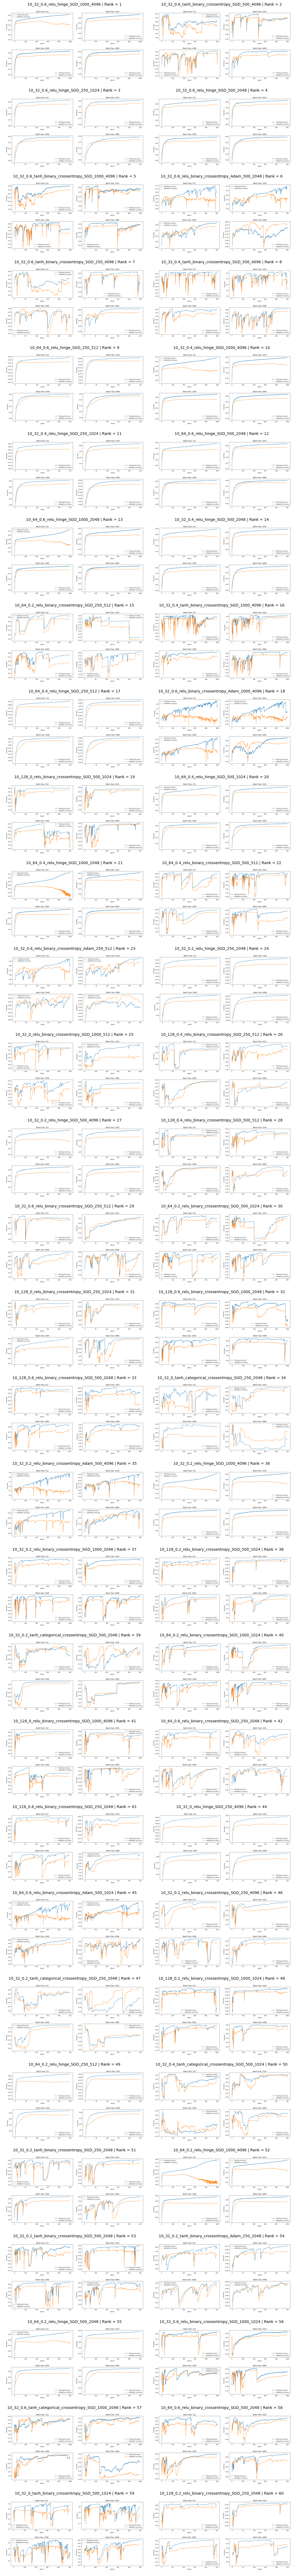

In [15]:
import math
# Define the number of rows and columns
num_rows = math.ceil(len(top_n_unique_model_parameters) / 2)
num_cols = 2

# Calculate the figure size based on the image dimensions
image_width = 1500  # Width of your images
image_height = 800  # Height of your images
fig_width = 12  # Adjust this based on your preference
fig_height = (fig_width / image_width) * image_height * num_rows / num_cols

# Create the figure and subplots
figure, axs = plt.subplots(num_rows, num_cols, figsize=(fig_width, fig_height))

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.2, hspace=0.4)

i = 0
for indx, row in top_n_unique_models_df.iterrows():
    row_indx = i // num_cols
    col_indx = i % num_cols
    i += 1
    ax = axs[row_indx, col_indx]
    
    model_parameter = row['model_parameter']
    fig_path = row['batch_size_path']
    img = Image.open(fig_path)
#     ax.imshow(img)

    
    # Display the image at its original aspect ratio
    ax.imshow(img)
    parameter = re.split(r'confusion_matrix_(.*?).png', row['confusion_matrix'])[1]
    ax.set_title(f'{parameter} | Rank = {i}', fontsize=10)
    ax.axis('off')

plt.tight_layout()
plt.savefig(f'{results_path}gru_script_2_top_n_model_train_val_accuracies.png')
plt.show()

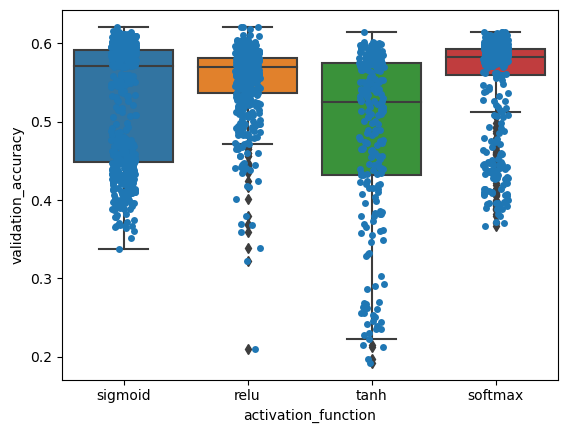

In [16]:
# Box plot for 'validation_accuracy' grouped by 'activation_function'
sns.boxplot(x='activation_function', y='validation_accuracy', data=df)
sns.stripplot(x='activation_function', y='validation_accuracy', data=df)
plt.show()

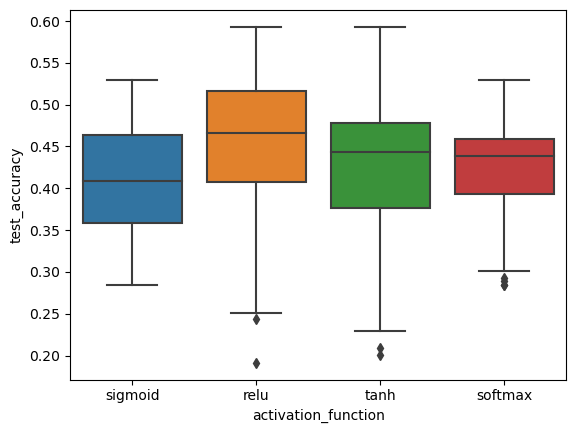

In [17]:
# Box plot for 'validation_accuracy' grouped by 'activation_function'
sns.boxplot(x='activation_function', y='test_accuracy', data=df)
# sns.stripplot(x='activation_function', y='test_accuracy', data=df)
plt.show()